In [1]:
import pandas as pd

df = pd.read_csv('/home/rohandoshi21/Development/College/PICT-TE-SEM6/DSBDAL/datasets/StudentsPerformance_modified.csv')

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [2]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [4]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [5]:
df.shape

(1000, 8)

In [6]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [7]:
df['math score'].replace(['?'], None, inplace=True)
df['math score'].fillna(df['math score'].mode())
df.dropna(inplace=True)

In [8]:
df.shape

(943, 8)

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [11]:
df = df.astype({'math score': float})
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [12]:
# df.boxplot()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

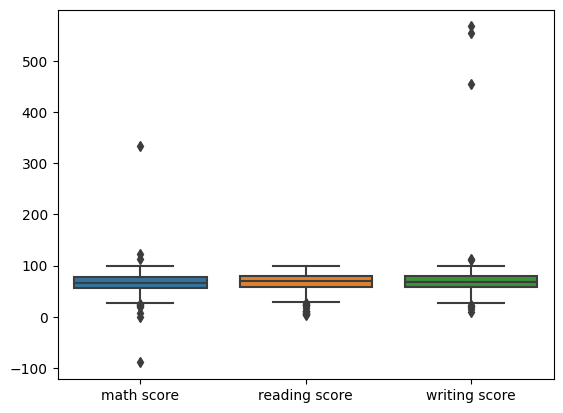

In [14]:
# Detecting outlier -> Boxplot
sns.boxplot(data=df)
plt.show()

In [15]:
# Detecting outliers -> Zscore
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['writing score']))
outliers = np.where(z > 3)
outliers


(array([514, 563, 623]),)

In [16]:
df.shape

(943, 8)

In [17]:
for x in outliers[0]:
    df.drop(x, inplace=True)

df.shape

(940, 8)

In [18]:
# Detecting outliers -> IQR
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['math score'] > lower) & (df['math score'] < upper)]
df.shape

(927, 8)

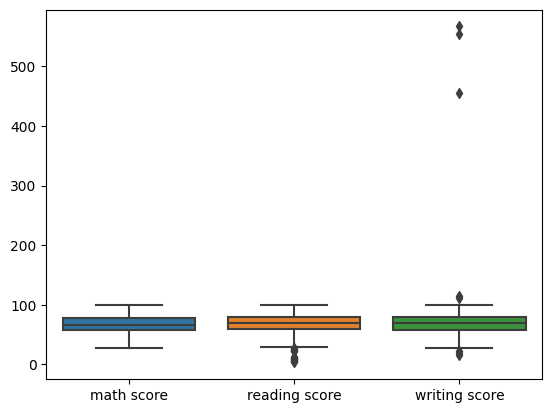

In [19]:
sns.boxplot(data=df)
plt.show()

In [20]:
df['writing score'].skew()

11.630940458489109

In [21]:
# Normalization
# 1. Min - Max
df['math score'] = (df['math score'] - df['math score'].min())/(df['math score'].max() - df['math score'].min())
df['math score'].describe()

count    927.000000
mean       0.534041
std        0.201569
min        0.000000
25%        0.402778
50%        0.527778
75%        0.680556
max        1.000000
Name: math score, dtype: float64

In [22]:
# 2. Z-score
df['reading score'] = (df['reading score'] - df['reading score'].mean())/df['reading score'].std()
df['reading score'].describe()

count    9.270000e+02
mean     3.372587e-16
std      1.000000e+00
min     -4.204421e+00
25%     -6.198670e-01
50%      8.424171e-02
75%      6.603307e-01
max      2.004538e+00
Name: reading score, dtype: float64

In [23]:
# Decimal scaling, log transformation 
df['writing score'] = np.log(df['writing score'])
df['writing score'].describe()

count    927.000000
mean       4.206122
std        0.265728
min        2.708050
25%        4.060443
50%        4.234107
75%        4.369448
max        6.340359
Name: writing score, dtype: float64

In [24]:
data = pd.get_dummies(df['race/ethnicity'], dtype=int)
data

,group A,group B,group C,group D,group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
995,0,0,0,0,1
996,0,0,1,0,0
997,0,0,1,0,0
998,0,0,0,1,0


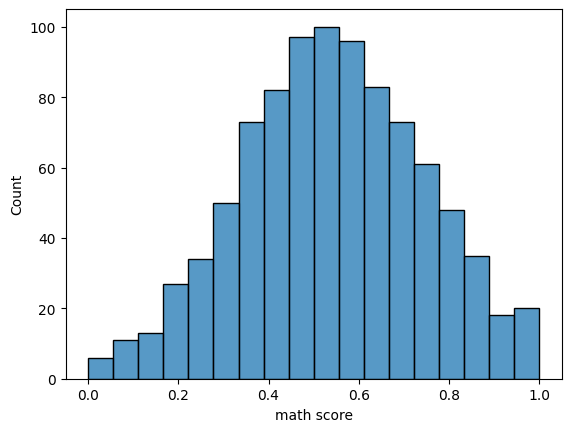

In [25]:
sns.histplot(data=df['math score'])
plt.show()

In [26]:
df.groupby('race/ethnicity').min()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group A,female,associate's degree,free/reduced,completed,0.000000,-3.884371,2.944439
group B,female,associate's degree,free/reduced,completed,0.027778,-4.012391,2.708050
group C,female,associate's degree,free/reduced,completed,0.013889,-4.012391,3.295837
group D,female,associate's degree,free/reduced,completed,0.013889,-4.204421,3.526361
group E,female,associate's degree,free/reduced,completed,0.027778,-3.692342,3.091042


In [27]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['>20%', '20-40%', '40-60%', '60-80%', '80-100%']
df['grade'] = pd.cut(x=df['math score'], bins=bins, labels=labels)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,grade
0,female,group B,bachelor's degree,standard,none,0.611111,0.212261,4.304065,60-80%
1,female,group C,some college,standard,completed,0.569444,1.364439,4.477337,40-60%
2,female,group B,master's degree,standard,none,0.861111,1.684489,4.532599,80-100%
3,male,group A,associate's degree,free/reduced,none,0.263889,-0.747887,3.784190,20-40%
4,male,group C,some college,standard,none,0.666667,0.596321,4.317488,60-80%
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.833333,1.940528,4.553877,80-100%
996,male,group C,high school,free/reduced,none,0.472222,-0.875907,4.007333,40-60%
997,female,group C,high school,free/reduced,completed,0.430556,0.148252,4.174387,40-60%
998,female,group D,some college,standard,completed,0.555556,0.596321,4.343805,40-60%


In [28]:
df['reading score'].quantile(0.5)

0.08424170571696078

<Axes: >

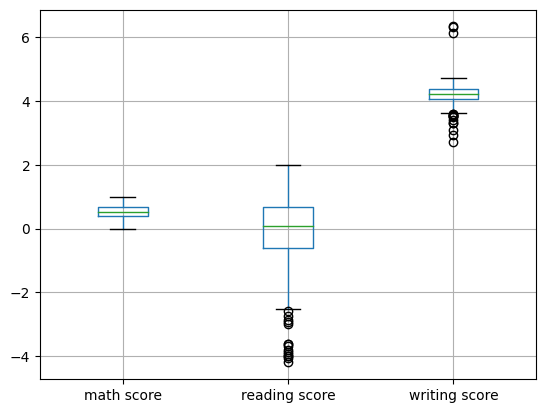

In [29]:
df.boxplot()

<Axes: xlabel='math score', ylabel='race/ethnicity'>

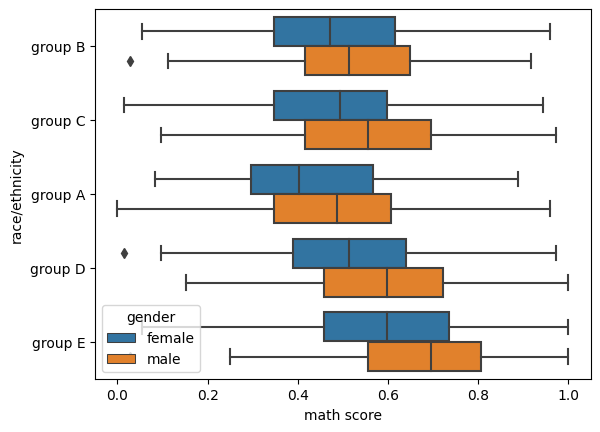

In [30]:
sns.boxplot(data=df, x='math score', y='race/ethnicity', hue='gender')

<Axes: >

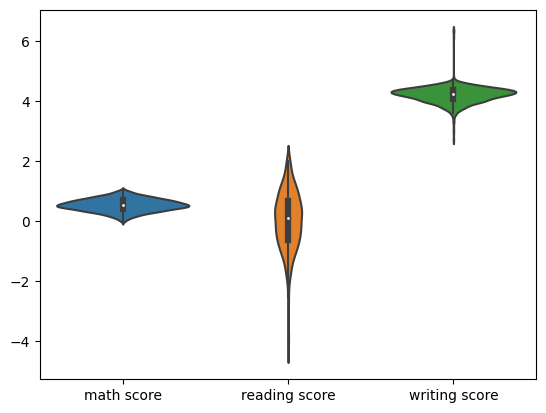

In [31]:
sns.violinplot(data=df)

<Axes: xlabel='math score', ylabel='Count'>

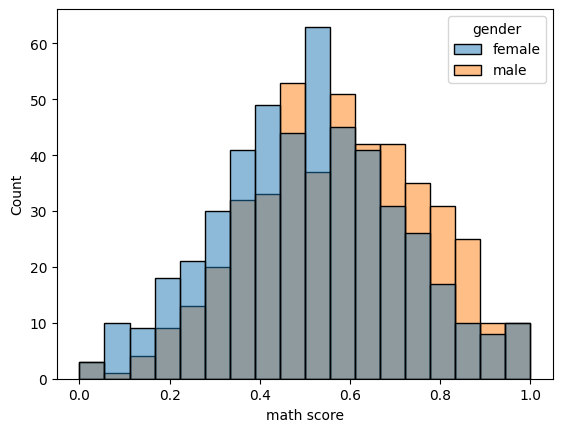

In [32]:
sns.histplot(data=df, x='math score', hue='gender')

In [33]:
import seaborn as sns
dfa = sns.load_dataset("iris")
dfa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
print("Mean")
for x in dfa.columns:
    try:
        print(f"{x} -> {dfa[x].mean()}")
    except:
        print()

Mean
sepal_length -> 5.843333333333334
sepal_width -> 3.0573333333333337
petal_length -> 3.7580000000000005
petal_width -> 1.1993333333333336



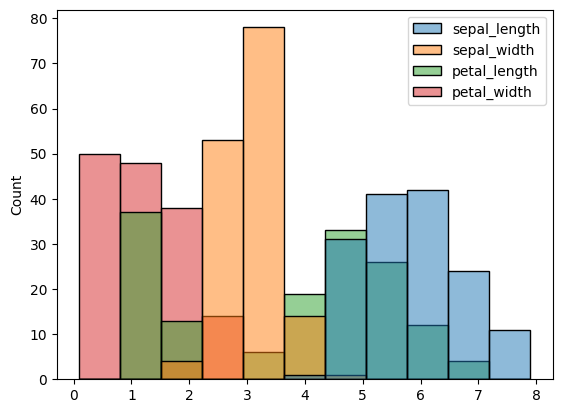

In [35]:
sns.histplot(data=dfa)
plt.show()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

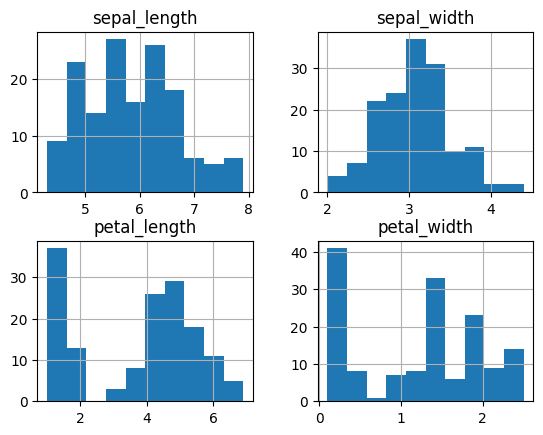

In [36]:
dfa.hist()

<Axes: >

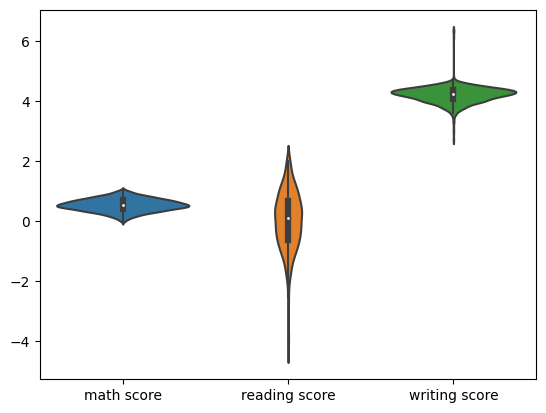

In [37]:
sns.violinplot(data=df)

In [38]:
X = dfa.drop(['species'], axis=1)
y = dfa['species']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [41]:
print(model.score(X_test, y_test))

1.0


In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

print("Confusion Matrix:")
print(cm)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

precision = precision_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')

print(precision)
print(accuracy)
print(recall)

Confusion Matrix:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
True Positives (TP): 16
False Positives (FP): 0
True Negatives (TN): 13
False Negatives (FN): 0
1.0
1.0
1.0


In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [45]:
import string

def Tokenize(sentence : str):
    punc = string.punctuation + "[]{}()"
    for i in punc:
        sentence.replace(i, "")
    sentence = sentence.lower()
    x = sentence.split()
    return x

sentence = "Hi there i am rohan, i know a lot of different things in life i am exicited to enjoy life"
tokens = Tokenize(sentence)
tokens

['hi',
 'there',
 'i',
 'am',
 'rohan,',
 'i',
 'know',
 'a',
 'lot',
 'of',
 'different',
 'things',
 'in',
 'life',
 'i',
 'am',
 'exicited',
 'to',
 'enjoy',
 'life']

In [46]:
def removeStopWords(tokens):
    stopwordslist = set(stopwords.words('english'))
    x = [word for word in tokens if not word in stopwordslist]
    return x

tokens = removeStopWords(tokens)
tokens

['hi',
 'rohan,',
 'know',
 'lot',
 'different',
 'things',
 'life',
 'exicited',
 'enjoy',
 'life']

In [47]:
from nltk import pos_tag

x = pos_tag(tokens)
x

[('hi', 'NN'),
 ('rohan,', 'NN'),
 ('know', 'VBP'),
 ('lot', 'RB'),
 ('different', 'JJ'),
 ('things', 'NNS'),
 ('life', 'NN'),
 ('exicited', 'VBD'),
 ('enjoy', 'JJ'),
 ('life', 'NN')]

In [48]:
stemmer = PorterStemmer()
for word in tokens:
    print(f"{word} -> {stemmer.stem(word)}")

hi -> hi
rohan, -> rohan,
know -> know
lot -> lot
different -> differ
things -> thing
life -> life
exicited -> exicit
enjoy -> enjoy
life -> life


In [49]:
lemmer = WordNetLemmatizer()
for word in tokens:
    print(f"{word} -> {lemmer.lemmatize(word)}")    

hi -> hi
rohan, -> rohan,
know -> know
lot -> lot
different -> different
things -> thing
life -> life
exicited -> exicited
enjoy -> enjoy
life -> life


In [50]:
def calculateTF(token):
    term_freq = {}
    for word in token:
        if word not in term_freq:
            term_freq[word] = token.count(word) / len(token)

    return term_freq

calculateTF(tokens)

{'hi': 0.1,
 'rohan,': 0.1,
 'know': 0.1,
 'lot': 0.1,
 'different': 0.1,
 'things': 0.1,
 'life': 0.2,
 'exicited': 0.1,
 'enjoy': 0.1}

In [51]:
def calculateTF_IDF(documents):
    documents = sent_tokenize(documents)
    document_map = {}
    document_tf = {}
    unique_words = set()
    word_idf = {}
    
    for i, document in enumerate(documents):
        tokenizedWords  = Tokenize(document)
        document_map[i] = tokenizedWords

        document_tf[i] = calculateTF(tokenizedWords)

        for word in tokenizedWords:
            unique_words.add(word)

    for word in unique_words:
        count = 0
        for _, tokenedWords in document_map.items():
            if word in tokenedWords:
                count += 1

        word_idf[word] = count

    return word_idf, document_tf
        
sentence1 = "Stemming and lemmatization are different techniques used to reduce words to their root form, but they produce varying results. Lemmatization is better than stemming"
word_idf, document_tf = calculateTF_IDF(sentence1)
print(word_idf)

{'but': 1, 'techniques': 1, 'their': 1, 'varying': 1, 'is': 1, 'words': 1, 'reduce': 1, 'are': 1, 'root': 1, 'than': 1, 'stemming': 2, 'form,': 1, 'produce': 1, 'they': 1, 'used': 1, 'different': 1, 'and': 1, 'better': 1, 'lemmatization': 2, 'to': 1, 'results.': 1}
